In [1]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
# read in the iris data
iris = load_iris()

# create x (features) and y (response/label)

X = iris.data
y = iris.target


In [6]:
# use train/test split with different random_state values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

# check classification accuracy of KNN with k=5

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

1.0


## Cross-Validation example: parameter tuning ##

In [7]:
from sklearn.cross_validation import cross_val_score

In [8]:
# 10-fold cross-validation with k=5 for KNN
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring = 'accuracy')
print (scores)

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [9]:
# use average accuracy as an estimrate of out-of-sample accuracy
print (scores.mean())

0.966666666667


In [10]:
# Search for an optimal value of K for KNN
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(k)
    scores = cross_val_score(knn, X, y, cv=10, scoring = 'accuracy')
    k_scores.append(scores.mean())
print (k_scores)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


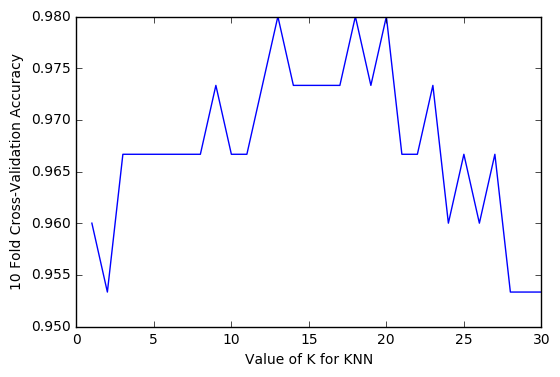

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value for k for KNN (x-axis) versus the cross-validation accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('10 Fold Cross-Validation Accuracy')

In [12]:
# 10-fold cross-validation with k=5 for KNN
knn = KNeighborsClassifier(n_neighbors=20)
scores = cross_val_score(knn, X, y, cv=10, scoring = 'accuracy')
print (scores)

[ 1.          0.93333333  1.          1.          1.          0.93333333
  0.93333333  1.          1.          1.        ]


In [13]:
print (scores.mean())

0.98


## Compare the best KNN model with logistic regression on the iris data set

In [15]:
# import logistic regression classifier from sklearn and compare model accuracy using 10-fold
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print (cross_val_score(logreg, X, y, cv=10, scoring = 'accuracy').mean())

0.953333333333


## How cross-validation can help with feature selection

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [17]:
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [18]:
# create a python list of three feature names
feature_cols = ['TV','Radio','Newspaper']

# use the list to select a subset of the dataframe (X)
X = data[feature_cols]

# select the sales column as the response/label (y)
y = data.Sales

In [20]:
# 10-fold cross-validation with all three features
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='mean_squared_error')
print (scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [21]:
# fix teh sign of MSE scores
mse_scores = -scores
print (mse_scores)

[ 3.56038438  3.29767522  2.08943356  2.82474283  1.3027754   1.74163618
  8.17338214  2.11409746  3.04273109  2.45281793]


In [22]:
# convert MSE to RMSE
rmse_scores = np.sqrt(mse_scores)

In [23]:
# calcualte the average root mean squared error
print (rmse_scores.mean())

1.69135317081


In [27]:
# Compare the rmse for the same model minus the newspaper feature
feature_cols = ['TV','Radio']
X = data[feature_cols]
y = data.Sales

print (np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='mean_squared_error').mean()))

1.73606427172
